In [12]:
import warnings
warnings.filterwarnings('ignore')

# パターン認識
パターンとは、物理的外界に存在する対象が、ほかの対象と区別されるための物理量や概念データのまとまりをいう。  
パターン認識とは、画像、音声などのデータの分類、判別、識別を行う方法である。

## パターン認識の概要
### パターン認識とは
#### クラス分類
硬貨の分類を考える。真の硬貨と疑似硬貨が混在しているとき、自動で分別したい。このため、次のものを用意する。  
- 特徴抽出機 : センサを用いて物理量を測り、特徴量を抽出する
- 特徴ベクトル : 複数の特徴量をベクトル形式で表したもの
- クラス : 最終的に分別するパターン
- クラス分類器 : 特徴ベクトルを用いてパターン認識を行い、その結果をクラスとして出力する
これは、あらかじめクラスが既知のデータを用いて照合できることから、教師あり学習の範疇に入る。

#### クラスタリング
先と異なり、クラスが未知であり、出力結果を照合または判定できない場合がある。この場合、特徴ベクトルの似たものどうしのかたまりをいくつか作成し、区別するという考え方がある。  
いくつかのクラスタを生成するするのがクラスタリングであり、こちらは教師なし学習となる。

### クラス分類の性能評価
2クラスの教師あり学習をクラス分類で行った時、得られたクラス分類器の性能評価として、混同行列を用いる方法を説明する。
混同行列とは、真のクラス、クラス分類器の出力、それぞれを2値で表し、その正誤の数を見るものである。
- 正答率 : 正しく分類できた割合
- 適合率 : Positiveと分類したうち正しかった割合
- 再現率 : 真のクラスがPositiveのうち、出力がPositiveとしたものの割合
- F値 : 適合率と再現率の調和平均

### ホールドアウトと交差検証
もともとのデータをトレーニングデータとテストデータに分割する方法として、ホールドアウトと交差検証がある。
#### ホールドアウト
1つのデータセットを、たとえばトレーニングデータに7割、テストデータに3割分割する、といった方法である。
#### 交差検証
データセットをk個に分割し、そのうち(k-1)個をトレーニングデータに、残りの1個をテストデータに分割する。この分割を、順繰りにk回繰り返し、計算結果の評価を行う方法である。

### 扱うパターン認識
#### クラス分類
- SVM : 有力な分類性能を有し、非線形にも対応する
- kNN : アルゴリズムは単純だが、性能は比較的良い。ただし、数式でクラス分類できない。
#### クラスタリング
- 非階層型 : 分割の良さの評価関数に基づき、分割を探索する。
- 階層型 : 類似度の高いものから順にまとまりを作成する。


## サポートベクターマシーン(SVM)
教師ありデータに対して、認識性能が比較的高く、よく用いられるパターン認識の1つ。線形分離できない問題に対処できる。

### クラス分類とマージン最大化
SVMは、マージンを最大化するクラス分類線を見出す考え方を採用している。(図がないと説明が難しいため、詳細は割愛)  
クラス分類線で完全分類できることをハードマージン、完全分類できない事例を扱う考え方がソフトマージンである。

### 非線形分離のアイデア
(図がないと説明が難しいため、詳細は割愛)  

### 線形、円形、月形データのハードマージン
#### 線形データの分離
線形分離できる2クラスのデータを対象としたSVMの適用例を説明する。


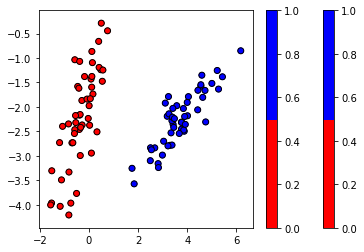

In [7]:
from sklearn import svm
from sklearn.datasets import make_classification, make_circles, make_moons
from matplotlib.colors import ListedColormap # 散布図で独自のカラーマップを使用
import matplotlib.pyplot as plt
import numpy as np

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, class_sep=2.0, shift=None, random_state=5)

# 図示する
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors='k')
plt.colorbar()
plt.show()

これにより、説明変数がX、クラスがyに格納される。このとき、説明変数の特徴量は2次元である。このデータに対し、線形カーネルを用いたSVMの適用の仕方は次である。

In [2]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

SVMの結果はclfに格納される。これを用いて、マージンの境界(破線)、決定境界(超平面)、選ばれたサポートベクタを以下に示す。

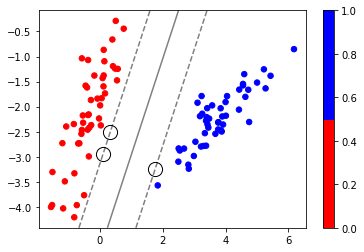

In [9]:
cbar = plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright) # c=y, yが示すラベル0, 1で色分け
plt.colorbar(cbar)
# plot the decision function
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# 超平面までの距離を求め，次にグリッドに合わせてreshape((30,30))
Z = clf.decision_function(xy).reshape(XX.shape) 
# マージンの境界線と超平面を等高線に描く
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #等高線の本数と間隔をlevelsで指定
           linestyles=['--', '-', '--'])
# サポートベクタを白丸でプロット
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
plt.show()

SVMによるクラス分類は、クラス分類器を構築してデータの分類を行うだけではなく、新たにデータを得た時、これが度のクラスに属するかを判定する。  
以下に例を示す。

In [10]:
testX = np.array([[1.0, -3.0], [1.0, -2.5]])
judge = clf.predict(testX)
judge

array([1, 0])

上記は、1つめのデータはクラス1に属し、2つめのデータはクラス0に属していることを示している。  
次に円形と月形データに対してSVMを適用する場合を記す。(図は省略)

In [13]:
# ガウシアンカーネル
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [14]:
# 多項式カーネル
clf = svm.SVC(kernel='poly', degree=3, coef0=1.0, C=1000)
clf.fit(X,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=1.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### ソフトマージンとホールドアウト
ソフトマージンでは、100%分類が困難なデータを対象とする。この考え方は、ほかのクラスへの混入を認めるが、その代わりにペナルティを科すという考え方である。  
ソフトマージンの場合、混入を認めるので、クラス分類器の性能を見ることが必要になる。このため、ソフトマージンの取り扱い方は、次のステップを経る。
- ステップ1 : データを発生させ、ホールドアウト法でトレーニングデータとテストデータに分割する。
- ステップ2 : トレーニングデータに対し、ソフトマージンを考慮したSVMを適用してクラス分類器を得る。
- ステップ3 : トレーニングデータに対するクラス分類器の性能評価を行う。
- ステップ4 : テストデータに対するクラス分類器の性能評価を行う。

In [15]:
# 必要なもの
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [16]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, class_sep=0.4, shift=None, random_state=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X_train,y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

このCがペナルティの度合いである。Cが小さいほど混入を認め、大きいほどハードマージンに近くなる。  
このクラス分類機の性能評価のうち、ご認識が何個あるかを知るには次の混同行列を用いると便利である。

In [23]:
y_test_pred = clf.predict(X_test)
print("予測値: %s" % y_test_pred)
print("真値　: %s" % y_test)

予測値: [0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1]
真値　: [1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1]


In [24]:
print('テストデータ　　　　　正解率', clf.score(X_test, y_test))   
print('confusion = \n %s' % confusion_matrix(y_test, y_test_pred))
print('accuracy = %f ' % accuracy_score(y_test, y_test_pred))
print('precision = %f ' % precision_score(y_test, y_test_pred))
print('recall = %f ' % recall_score(y_test, y_test_pred))
print('F-measure = %f' % f1_score(y_test, y_test_pred))

テストデータ　　　　　正解率 0.9
confusion = 
 [[10  1]
 [ 1  8]]
accuracy = 0.900000 
precision = 0.888889 
recall = 0.888889 
F-measure = 0.888889


一括しておこなう場合は次である。


In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



### 交差検証とグリッドサーチ
#### 交差検証
データを5分割する交差検証を行うため、関数cross_val_scoreを用いる。

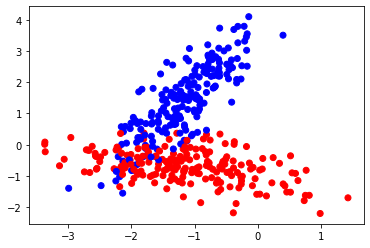

In [30]:
Num = 400 # 全サンプル数
CV = 5    # サンプル数をCV(Cross Validation)だけ分割する
X, y = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　分離度
                            shift=None, 
                            random_state=5) # 乱数の再現性
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright)
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score, cross_validate

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=CV, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f) for 95 %% confidence interval" % (scores.mean(), scores.std() * 2))

[0.8625 0.95   0.9375 0.8875 0.9125]
Accuracy: 0.91 (+/- 0.06) for 95 % confidence interval


#### グリッドサーチ
良い分類器を見出すには、カーネルの種類とそれに付随するパラメータの値を決定しなければならない。これを総当りで行うことは、あたかも格子状をくまなく探索することからグリッドサーチと称している。  
使用例を以下に示す。

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions

1行目ではグリッドサーチを行うため、2行目は性能評価のためである。3行目は、決定領域を色分けして決定境界がどこにあるかを簡単にプロットする外部パッケージである。

In [34]:
parameters = {'kernel': ('linear', 'rbf'), 'C': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0, 10.0]}
svc = svm.SVC()

In [36]:
CV = 5 # 分割数
clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=CV)
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

交差検証におけるベストスコアと、このときの最適パラメータを表示する。

In [37]:
print('Best accuracy = ', clf.best_score_)
print(clf.best_params_)

Best accuracy =  0.925
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}


上記の出力は、与えたパラメタ候補の組み合わせの中で最適なクラス分類器を構築できたパラメタを示している。  
このクラス分類器の性能の検証を行う。

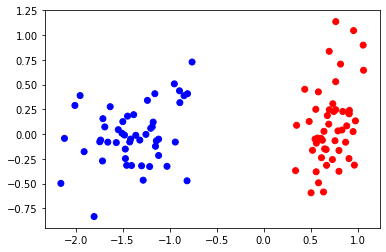

In [44]:
# テストデータの作成

Num = 100 # 追加サンプル数
X_test, y_test = make_classification( n_samples=Num, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=1.0, #　分離度
                            shift=None, 
                            random_state=1) # 異なる確率過程
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright)
plt.show()

In [48]:
best_clf = clf.best_estimator_
y_test_pred = best_clf.predict(X_test)
print('Accuracy score = ', accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy score =  0.74
              precision    recall  f1-score   support

           0       0.66      1.00      0.79        50
           1       1.00      0.48      0.65        50

    accuracy                           0.74       100
   macro avg       0.83      0.74      0.72       100
weighted avg       0.83      0.74      0.72       100



求めたクラス分類器の決定領域に合わせて、トレーニングデータとテストデータをプロットする。

Text(0.5, 0, '(b) Test data')

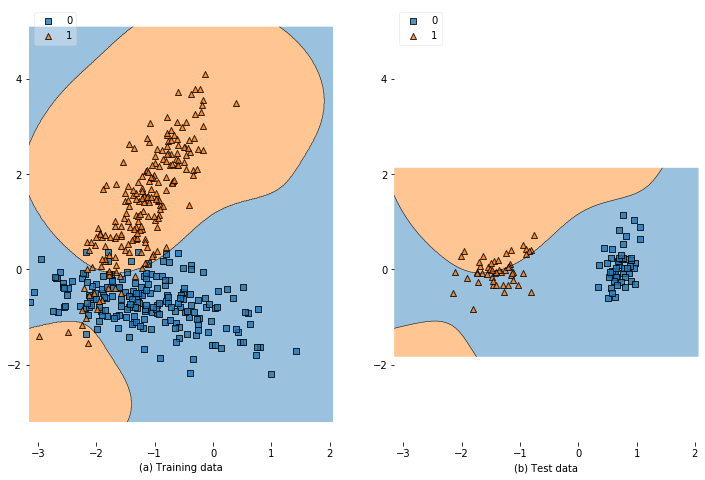

In [46]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharex=True, sharey=True)
plot_decision_regions(X, y, clf=best_clf, res=0.02, ax=axes[0], legend=2)
axes[0].set_xlabel('(a) Training data')

plot_decision_regions(X_test, y_test, clf=best_clf, res=0.02, ax=axes[1], legend=2)
axes[1].set_xlabel('(b) Test data')

同じ属性のテストデータを発生させると、トレーニングデータほどに性能は示されなかった。  
このクラス分類器の性能の考察を行うには、まずグラフを見て、そこからデータの背景にある物理的・社会科学的観点をいかにして取り込むかが大事だと言える。

### 多クラス分類
クラスの数が3以上の場合を多クラスと読んで区別することがある。
#### 一対他分類器
i=1,2,3,...,k-1の各クラスタiそれぞれについて、クラスiなら1を、その他のクラスなら0に分類する2クラス分類器をk個用いる。
#### 一対一分類器
k個のクラスから2つのクラス(i,j)の組み合わせk(k-1)/2個について、クラスiとjとを2クラス分類を考える。
#### Irisの多クラス分類

In [54]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0, 10.0], 'decision_function_shape': ('ovo', 'ovr')}
svm = svm.SVC()

clf = GridSearchCV(svm, parameters, scoring='accuracy', cv=5)
clf.fit(X, y)

print('Best accuracy = ', clf.best_score_)
print(clf.best_params_)

Best accuracy =  0.9666666666666667
{'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 10.0, 'kernel': 'poly'}


次に説明変数を4つすべて用いて、多クラス分類を行う。  
ただし、SVCのパラメータは上のGridSearchに従う。

In [60]:
from sklearn.svm import SVC

X = iris.data
y = iris.target
clf = SVC(C=0.1, kernel='poly', gamma=10.0, decision_function_shape='ovo').fit(X, y)
print(clf)
y_pred = clf.predict(X)
print('Accuracy = ', accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=10.0, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

